In [2]:
# Import essential libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import math as math
%matplotlib inline
sb.set()
plt.style.use('fivethirtyeight') 

In [75]:
games = pd.read_csv('games-prediction.csv', index_col= 0)
games

,original_price,discount_price,discount_percentage,genre_Action,genre_Adventure,genre_Casual,genre_Massively Multiplayer,genre_RPG,genre_Racing,genre_Simulation,...,Developer_PC3,Developer_PC4,Developer_PC5,Publisher_PC1,Publisher_PC2,Publisher_PC3,Publisher_PC4,Publisher_PC5,mature_content,status
0,19.99,14.99,25.012506,1,0,0,0,0,0,0,...,0.000069,-0.009827,-0.006300,-0.047265,-0.049798,-0.016603,-0.007283,-0.029931,False,good
1,29.99,29.99,0.000000,1,1,0,1,0,0,0,...,0.000001,-0.006472,-0.003492,-0.046366,-0.043805,-0.008096,-0.003144,-0.012810,True,bad
2,39.99,39.99,0.000000,1,1,0,0,0,0,0,...,0.000002,-0.006995,-0.003871,-0.047440,-0.051125,-0.020750,-0.009496,-0.040103,False,good
3,44.99,44.99,0.000000,1,1,0,1,0,0,0,...,0.000172,-0.009881,-0.007579,-0.046718,-0.046000,-0.010165,-0.004037,-0.016567,False,bad
4,0.00,0.00,0.000000,1,0,0,1,1,0,0,...,0.000002,-0.006995,-0.003871,-0.046427,-0.044171,-0.008393,-0.003269,-0.013336,False,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40481,13.99,13.99,0.000000,1,1,1,0,0,0,0,...,0.000001,-0.006472,-0.003492,-0.046366,-0.043805,-0.008096,-0.003144,-0.012810,True,good
40524,2.99,2.99,0.000000,1,1,0,0,0,0,0,...,0.000001,-0.006472,-0.003492,-0.046366,-0.043805,-0.008096,-0.003144,-0.012810,False,good
40598,14.99,14.99,0.000000,0,0,0,0,0,0,1,...,0.000001,-0.006595,-0.003580,-0.046381,-0.043896,-0.008169,-0.003174,-0.012938,False,good
40611,7.99,7.99,0.000000,0,1,0,0,0,0,0,...,0.000001,-0.006472,-0.003492,-0.046366,-0.043805,-0.008096,-0.003144,-0.012810,False,good


# Logistic Regression

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [103]:
# Import essential models and functions from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
X = games.drop(['status'], axis = 1) 
y = games['status']

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [104]:
# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

# Create the Logistic Regression object
LogisticR= LogisticRegression(max_iter=1000)      # set the maximum depth of each tree

# Fit Logistic Regression on Train Data
LogisticR.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Train Data
Accuracy  :	 0.6603918978423602

TPR Train :	 0.9588994565217391
TNR Train :	 0.11045056320400501

FPR Train :	 0.889549436795995
FNR Train :	 0.04110054347826087


<AxesSubplot:>

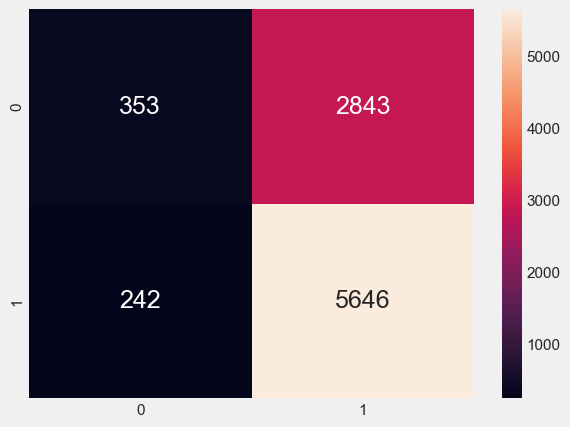

In [105]:
# Import confusion_matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_train_pred = LogisticR.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", LogisticR.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), annot = True, fmt=".0f", annot_kws={"size": 18}) 

Test Data
Accuracy  :	 0.6644649933949802

TPR Test :	 0.9553752535496958
TNR Test :	 0.12121212121212122

FPR Test :	 0.8787878787878788
FNR Test :	 0.04462474645030426


<AxesSubplot:>

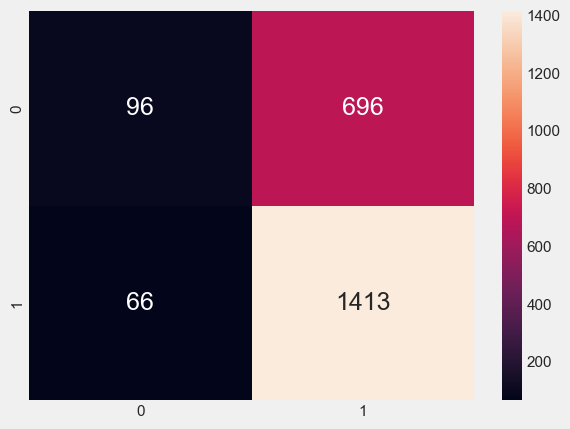

In [106]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = LogisticR.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", LogisticR.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

# Random Forest Regressor

In [107]:
# Import essential models and functions from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = games['status']
X = games.drop('status', axis = 1)

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [108]:
# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 1000,  # n_estimators denote number of trees
                                 max_depth = 15)       # set the maximum depth of each tree

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, n_estimators=1000)

Train Data
Accuracy  :	 0.8027176648213387

TPR Train :	 0.9775193798449613
TNR Train :	 0.47919655667144906

FPR Train :	 0.5208034433285509
FNR Train :	 0.02248062015503876


<AxesSubplot:>

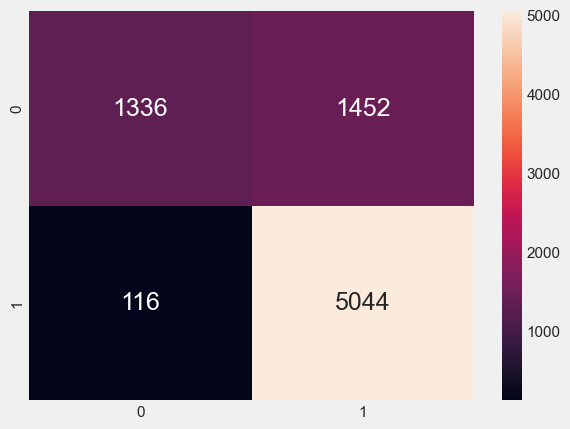

In [109]:
# Import confusion_matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.6692104490754329

TPR Test :	 0.8867240598096964
TNR Test :	 0.26916666666666667

FPR Test :	 0.7308333333333333
FNR Test :	 0.11327594019030358


<AxesSubplot:>

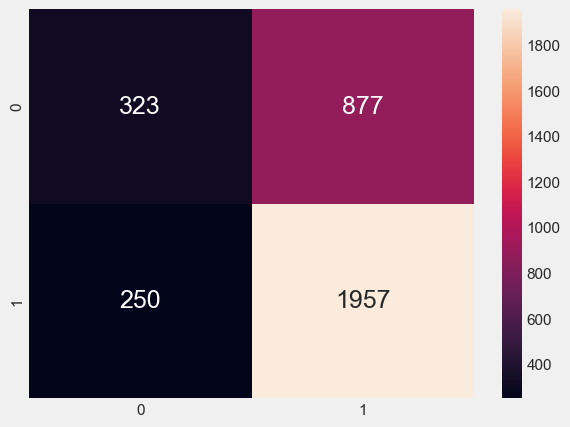

In [110]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = rforest.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

# Decision Tree

[Text(0.649963209833795, 0.9545454545454546, 'genre_Massively Multiplayer <= 0.5\ngini = 0.456\nsamples = 9084\nvalue = [3192, 5892]\nclass = good'),
 Text(0.4367858379501385, 0.8636363636363636, 'genre_Simulation <= 0.5\ngini = 0.447\nsamples = 8637\nvalue = [2912, 5725]\nclass = good'),
 Text(0.2268005540166205, 0.7727272727272727, 'discount_price <= 2.23\ngini = 0.427\nsamples = 6486\nvalue = [2001, 4485]\nclass = good'),
 Text(0.0907202216066482, 0.6818181818181818, 'Developer_PC2 <= -0.01\ngini = 0.464\nsamples = 1769\nvalue = [647, 1122]\nclass = good'),
 Text(0.08795013850415513, 0.5909090909090909, 'gini = 0.0\nsamples = 16\nvalue = [0, 16]\nclass = good'),
 Text(0.09349030470914127, 0.5909090909090909, 'genre_Action <= 0.5\ngini = 0.466\nsamples = 1753\nvalue = [647, 1106]\nclass = good'),
 Text(0.04813019390581717, 0.5, 'genre_Casual <= 0.5\ngini = 0.446\nsamples = 864\nvalue = [290, 574]\nclass = good'),
 Text(0.019390581717451522, 0.4090909090909091, 'mature_content <= 0.5\

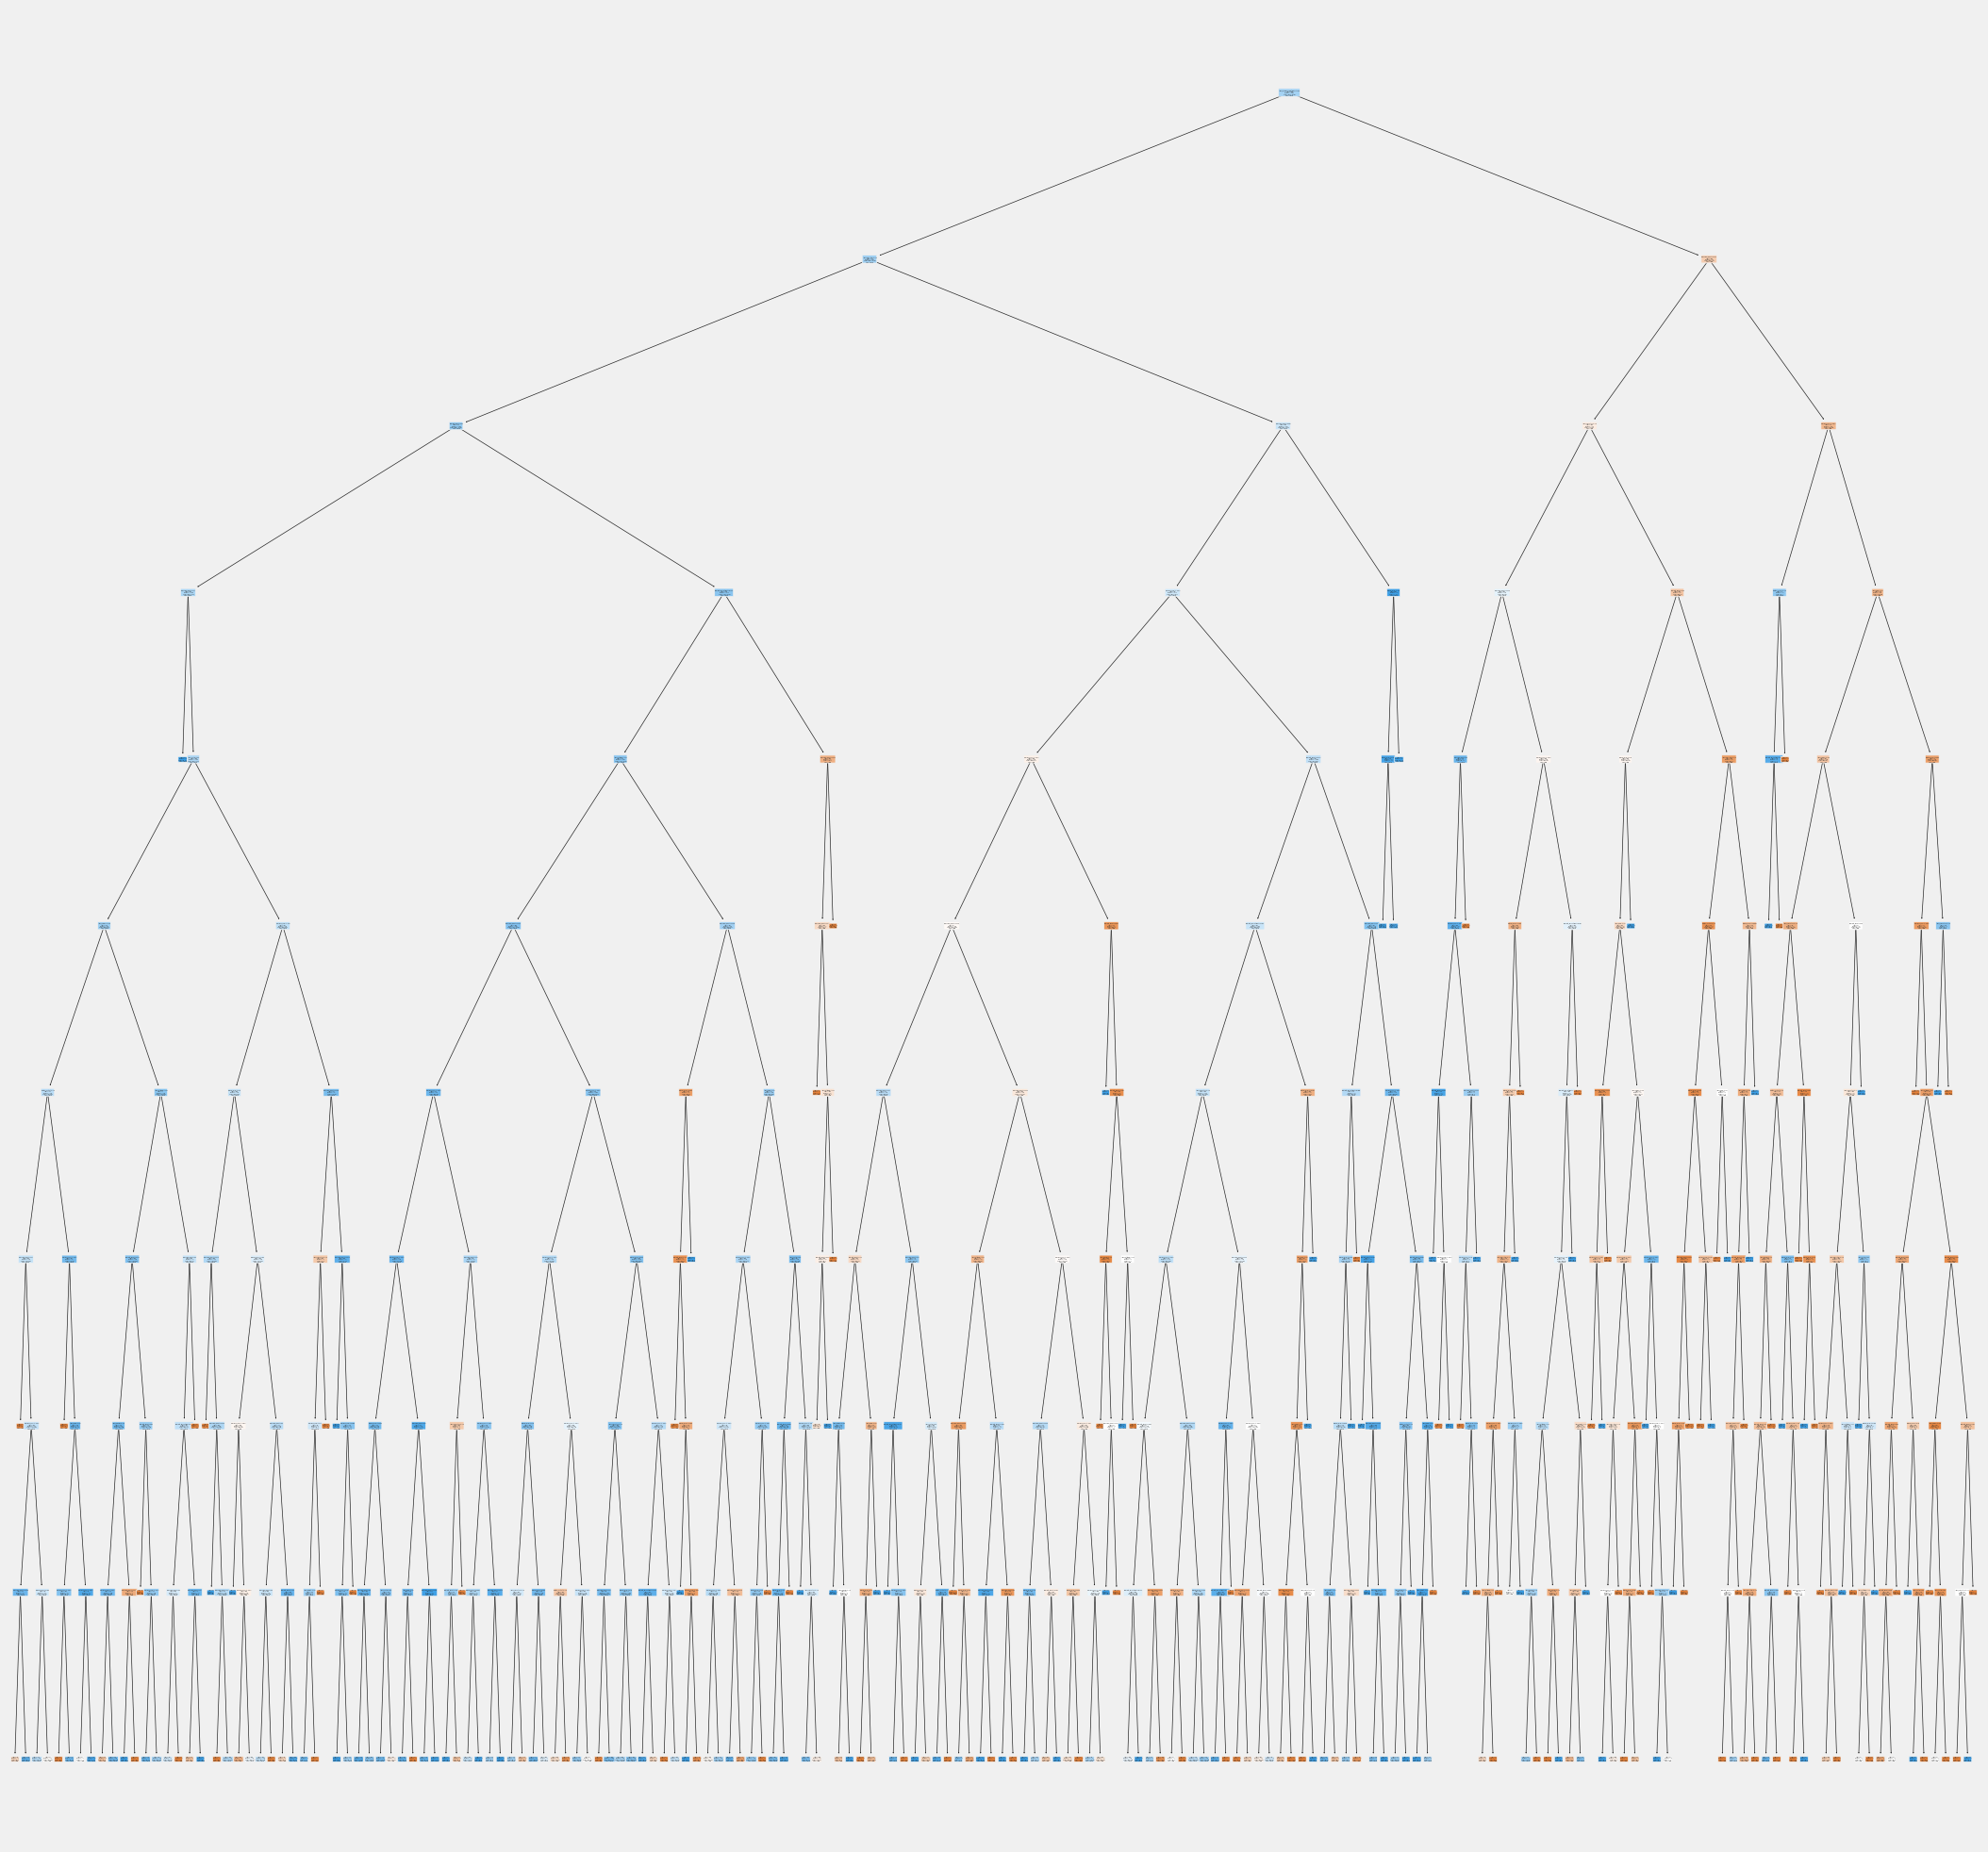

In [136]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

# Extract Response and Predictors
y = games['status']
X = games.drop('status', axis = 1)

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 10)  
dectree.fit(X_train, y_train)                    

# Plot the trained Decision Tree
f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["bad","good"])

Train Data
Accuracy  :	 0.7107001321003963

TPR Train :	 0.9249830278343517
TNR Train :	 0.3151629072681704

FPR Train :	 0.6848370927318296
FNR Train :	 0.07501697216564834


<AxesSubplot:>

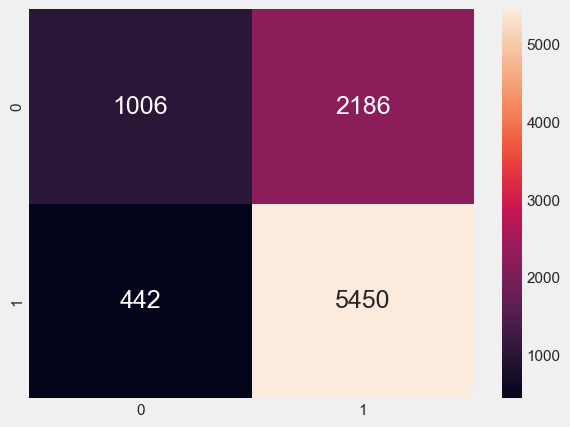

In [137]:
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.6534566270365477

TPR Test :	 0.8705084745762712
TNR Test :	 0.25125628140703515

FPR Test :	 0.7487437185929648
FNR Test :	 0.12949152542372883


<AxesSubplot:>

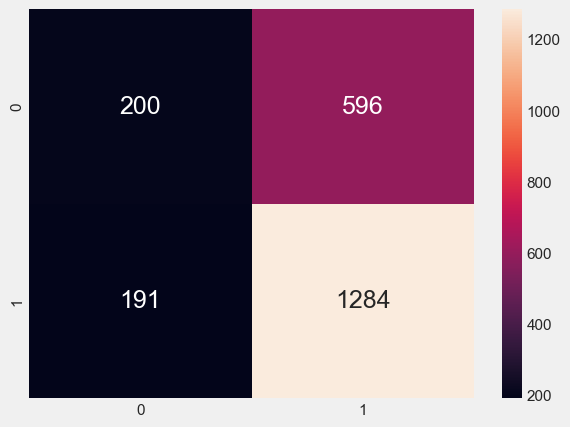

In [138]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

There is a huge imbalance in the *False Positives* and *False Negatives* in the confusion matrix. *False Positives* are much higher in number than *False Negatives* in both Train and Test data. This is a direct effect of the large `Good` vs `Bad` class imbalance in the response variable `Status`. As `Status = Good` was more likely in the data, *False Positives* are more likely too. 

In [139]:
# Upsample Bad to match Good
from sklearn.utils import resample

gamesBad = games[games.status == 'bad']
gamesGood = games[games.status == 'good']
 
# Upsample the Bad samples
gamesBad = resample(gamesBad, 
                        replace=True,                     # sample with replacement
                        n_samples=gamesGood.shape[0])    # to match number of Good
 
# Combine the two classes back after upsampling
games_equal_Good_Bad = pd.concat([gamesGood, gamesBad])
 
# Check the ratio of the classes
games_equal_Good_Bad['status'].value_counts()

good    7367
bad     7367
Name: status, dtype: int64

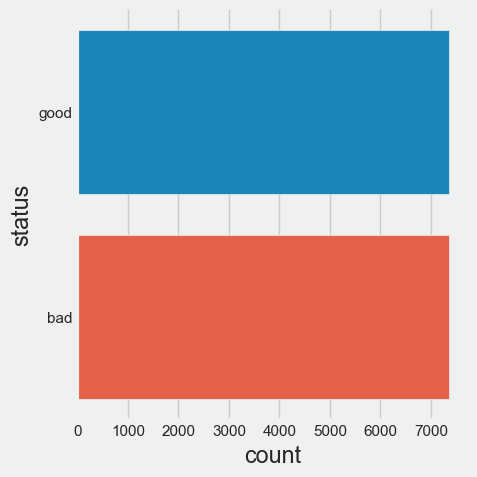

In [140]:
# Quick plot to check the balanced classes visually
sb.catplot(y = 'status', data = games_equal_Good_Bad, kind = "count")

[Text(0.7265946833161689, 0.9545454545454546, 'genre_Massively Multiplayer <= 0.5\ngini = 0.5\nsamples = 11787\nvalue = [5862, 5925]\nclass = good'),
 Text(0.534082131822863, 0.8636363636363636, 'genre_Simulation <= 0.5\ngini = 0.499\nsamples = 11114\nvalue = [5351, 5763]\nclass = good'),
 Text(0.30059217301750774, 0.7727272727272727, 'genre_Strategy <= 0.5\ngini = 0.495\nsamples = 8209\nvalue = [3689, 4520]\nclass = good'),
 Text(0.15660401647785788, 0.6818181818181818, 'discount_price <= 2.21\ngini = 0.491\nsamples = 6680\nvalue = [2886, 3794]\nclass = good'),
 Text(0.07028836251287332, 0.5909090909090909, 'discount_price <= 0.44\ngini = 0.5\nsamples = 1907\nvalue = [930, 977]\nclass = good'),
 Text(0.04505664263645726, 0.5, 'genre_Racing <= 0.5\ngini = 0.491\nsamples = 880\nvalue = [380, 500]\nclass = good'),
 Text(0.02420185375901133, 0.4090909090909091, 'genre_Action <= 0.5\ngini = 0.487\nsamples = 851\nvalue = [356, 495]\nclass = good'),
 Text(0.009268795056642637, 0.318181818181

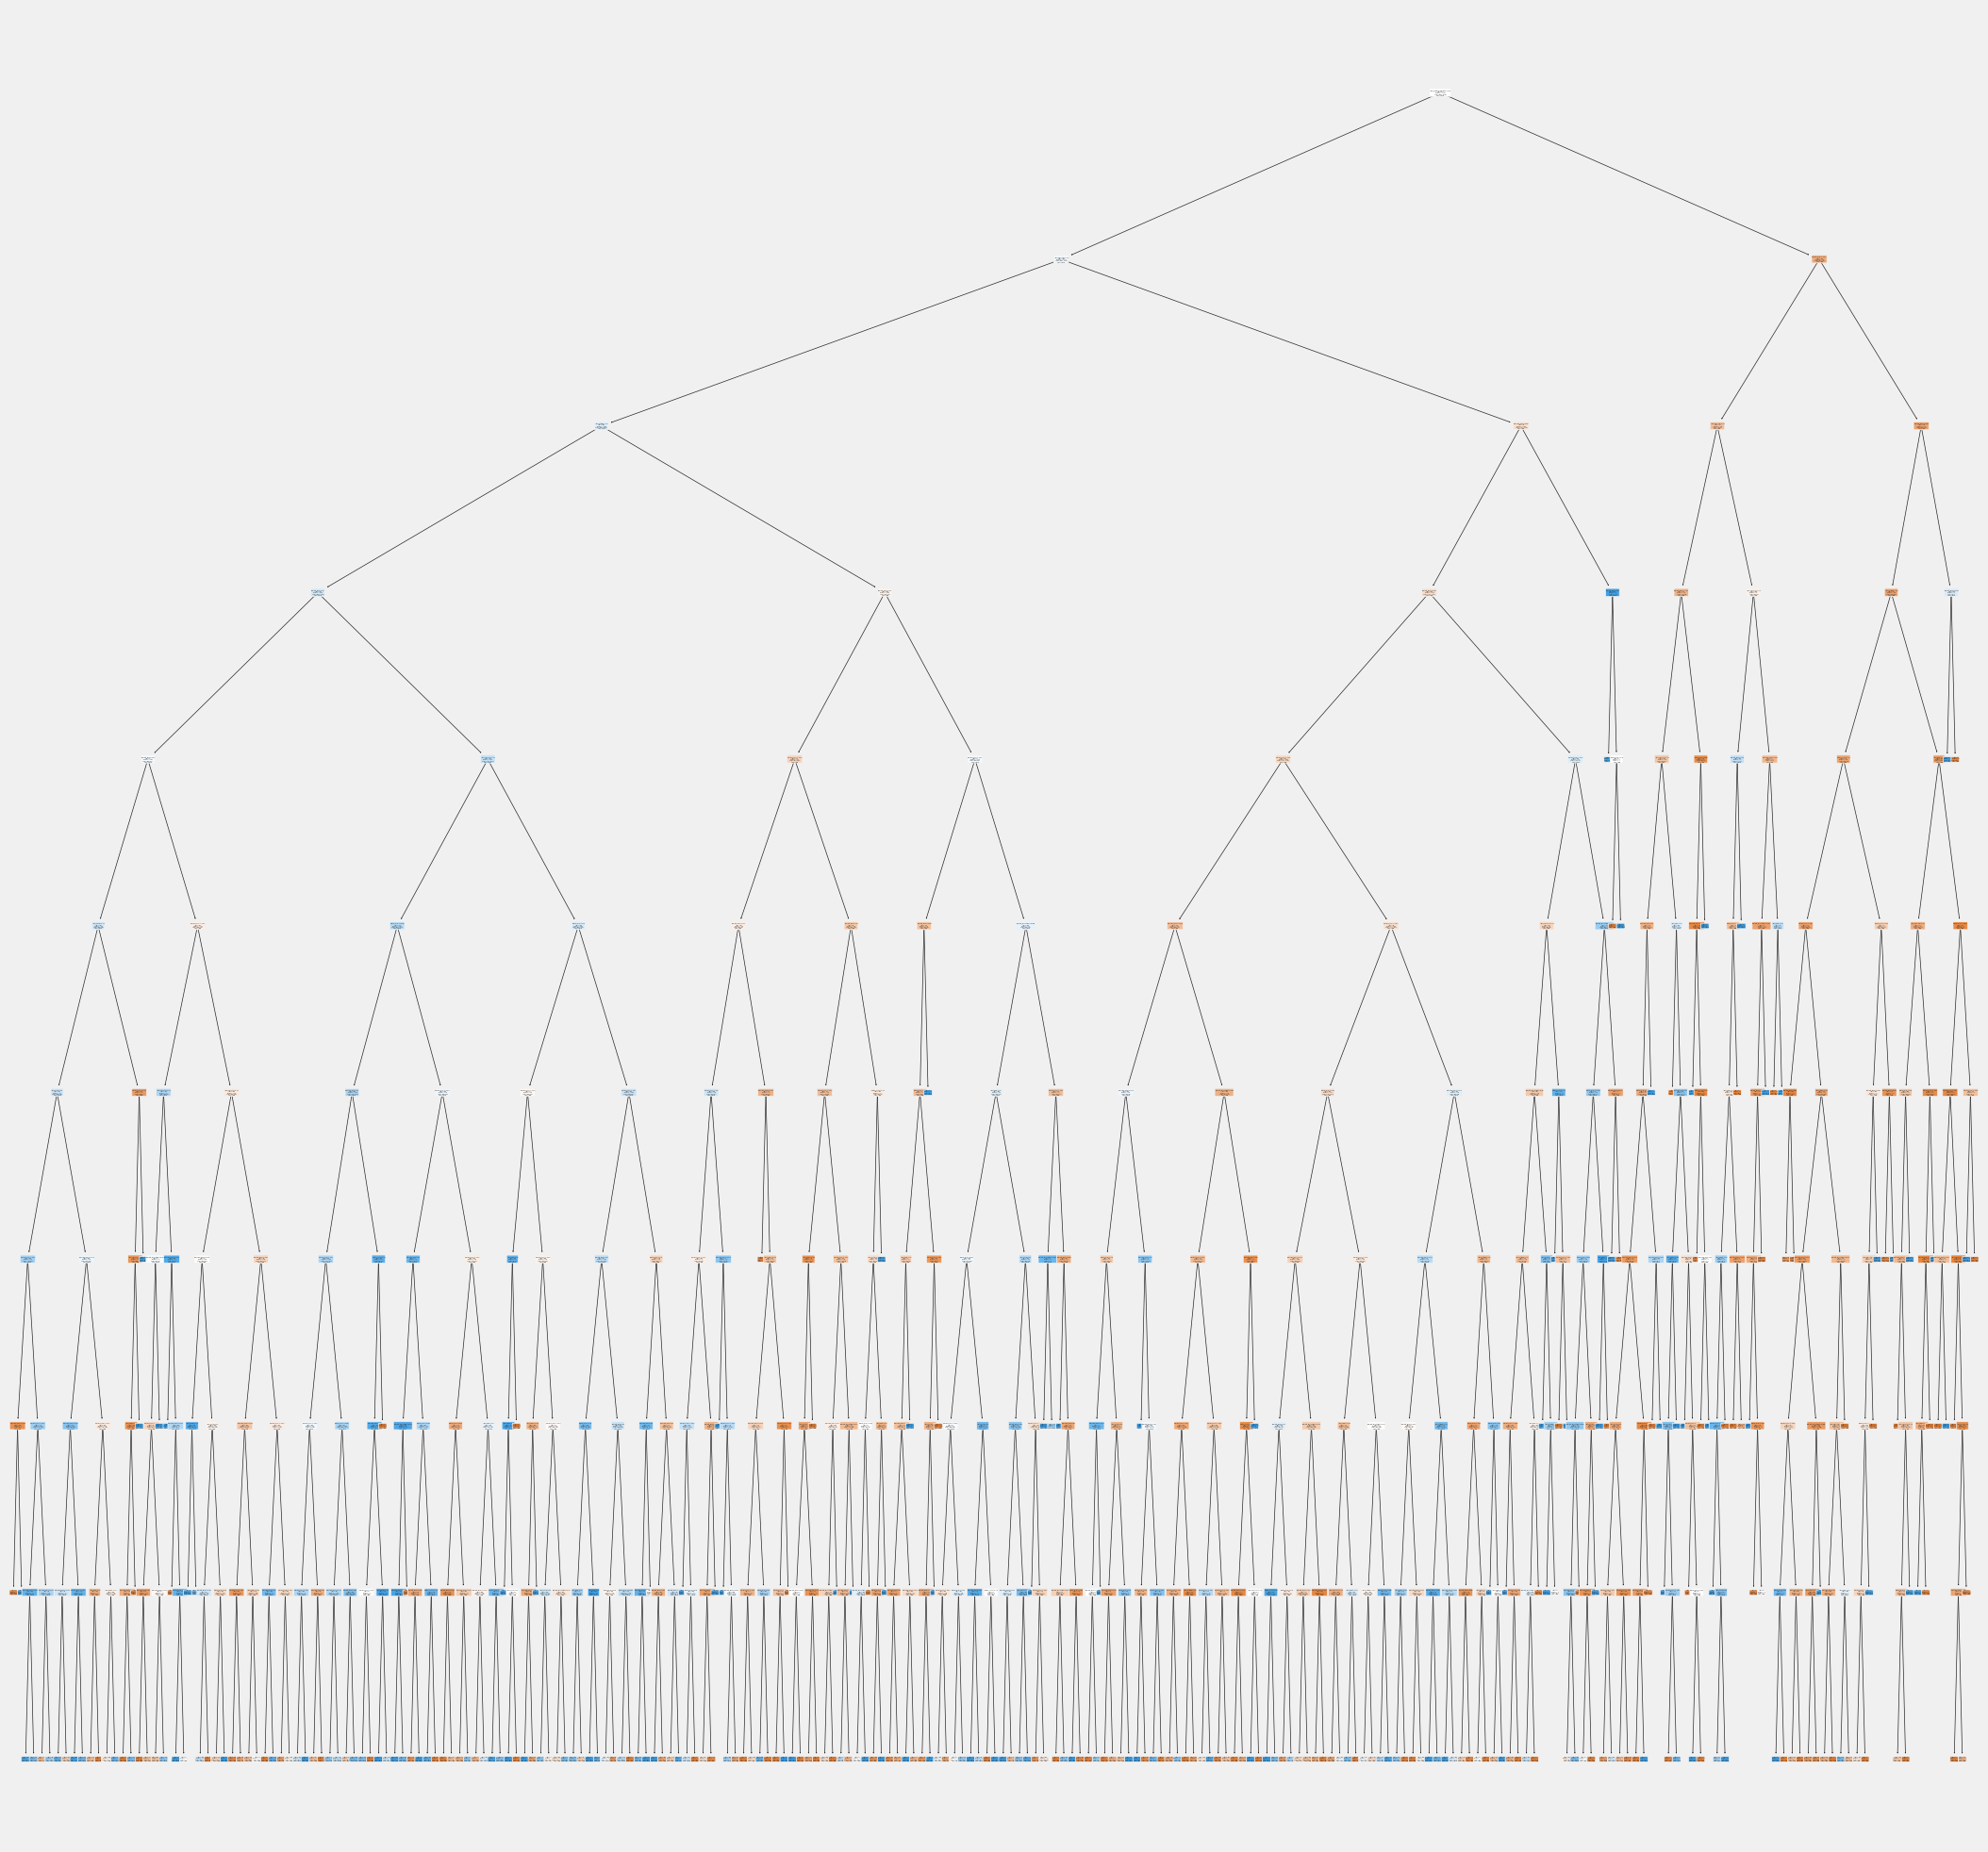

In [141]:
# Extract Response and Predictors
y = games_equal_Good_Bad['status']
X = games_equal_Good_Bad.drop('status', axis = 1)

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 10)  
dectree.fit(X_train, y_train)                    

# Plot the trained Decision Tree
f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["bad","good"])

Train Data
Accuracy  :	 0.6701450750827183

TPR Train :	 0.6977215189873418
TNR Train :	 0.642272262026612

FPR Train :	 0.3577277379733879
FNR Train :	 0.30227848101265825


<AxesSubplot:>

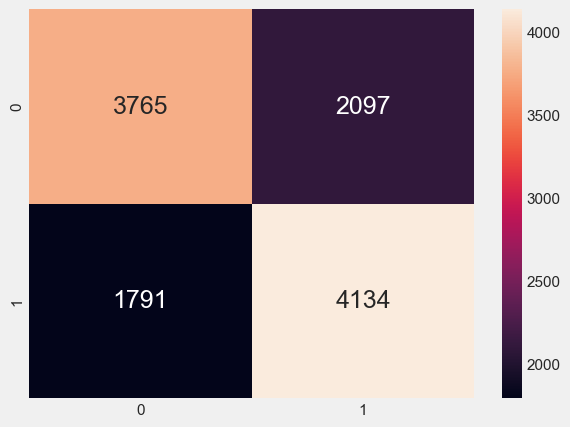

In [142]:
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.6270783847980997

TPR Test :	 0.651872399445215
TNR Test :	 0.6033222591362126

FPR Test :	 0.3966777408637874
FNR Test :	 0.34812760055478503


<AxesSubplot:>

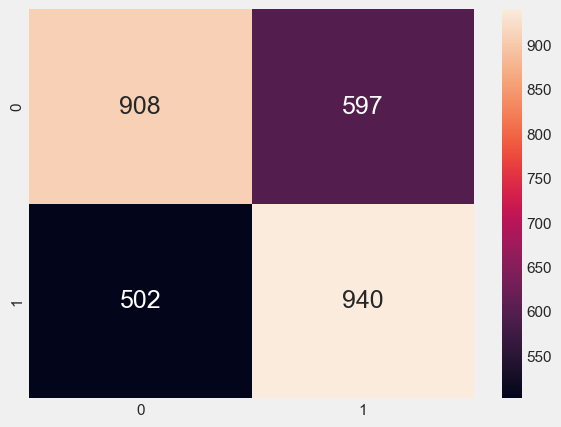

In [143]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [3]:
gam = pd.read_pickle('datasets/cleaned_steam_games.pkl')
gam

,name,all_reviews,release_date,release_date_epoch_days,developer,publisher,popular_tags,languages,mature_content,original_price,...,genre_Strategy,old_genre_Action,old_genre_Adventure,old_genre_Casual,old_genre_Massively Multiplayer,old_genre_RPG,old_genre_Racing,old_genre_Simulation,old_genre_Sports,old_genre_Strategy
0,DOOM,92,2016-05-12,16933,id Software,"Bethesda Softworks,Bethesda Softworks","[FPS, Gore, Action, Demons, Shooter, First-Per...","[English, French, Italian, German, Spanish - S...",False,19.99,...,0,1,0,0,0,0,0,0,0,0
1,PLAYERUNKNOWN'S BATTLEGROUNDS,49,2017-12-21,17521,PUBG Corporation,"PUBG Corporation,PUBG Corporation","[Survival, Shooter, Multiplayer, Battle Royale...","[English, Korean, Simplified Chinese, French, ...",True,29.99,...,0,1,1,0,1,0,0,0,0,0
2,BATTLETECH,71,2018-04-24,17645,Harebrained Schemes,"Paradox Interactive,Paradox Interactive","[Mechs, Strategy, Turn-Based, Turn-Based Tacti...","[English, French, German, Russian]",False,39.99,...,1,1,1,0,0,0,0,0,0,1
3,DayZ,61,2018-12-13,17878,Bohemia Interactive,"Bohemia Interactive,Bohemia Interactive","[Survival, Zombies, Open World, Multiplayer, P...","[English, French, Italian, German, Spanish - S...",False,44.99,...,0,1,1,0,1,0,0,0,0,0
4,EVE Online,74,2003-05-06,12178,CCP,"CCP,CCP","[Space, Massively Multiplayer, Sci-fi, Sandbox...","[English, German, Russian, French]",False,0.00,...,1,1,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40481,雨上がりのハナビィ Ameagari no Hanaby,100,2018-09-22,17796,Enigmatic Network,"Enigmatic Network,Enigmatic Network","[Indie, Adventure, Action, Casual, Sexual Cont...","[English, Japanese]",True,13.99,...,0,1,1,1,0,0,0,0,0,0
40524,Lil Big Invasion,100,2016-08-04,17017,Andreas Britten,"Andreas Britten,Andreas Britten","[Action, Indie, Adventure, Puzzle, Atmospheric...",[English],False,2.99,...,0,1,1,0,0,0,0,0,0,0
40598,Detached: Non-VR Edition,78,2018-07-24,17736,Anshar Studios,"Anshar Studios,Anshar Studios","[Simulation, Indie, Space, Exploration, Atmosp...","[English, French, German, Simplified Chinese, ...",False,14.99,...,0,0,0,0,0,0,0,1,0,0
40611,A Room Beyond,90,2017-06-13,17330,René Bühling,"René Bühling,René Bühling","[Adventure, Indie, Point & Click]","[English, German, French, Italian, Spanish - S...",False,7.99,...,0,0,1,0,0,0,0,0,0,0


In [5]:
gam.dtypes

name                                         object
all_reviews                                   int64
release_date                         datetime64[ns]
release_date_epoch_days                       int64
developer                                    object
publisher                                    object
popular_tags                                 object
languages                                    object
mature_content                                 bool
original_price                              float64
discount_price                              float64
discount_percentage                         float64
genre_Action                       Sparse[int32, 0]
genre_Adventure                    Sparse[int32, 0]
genre_Casual                       Sparse[int32, 0]
genre_Massively Multiplayer        Sparse[int32, 0]
genre_RPG                          Sparse[int32, 0]
genre_Racing                       Sparse[int32, 0]
genre_Simulation                   Sparse[int32, 0]
genre_Sports

In [6]:
gam.isnull().sum()

name                                 0
all_reviews                          0
release_date                         0
release_date_epoch_days              0
developer                           45
publisher                          411
popular_tags                         0
languages                            0
mature_content                       0
original_price                       0
discount_price                       0
discount_percentage                  0
genre_Action                         0
genre_Adventure                      0
genre_Casual                         0
genre_Massively Multiplayer          0
genre_RPG                            0
genre_Racing                         0
genre_Simulation                     0
genre_Sports                         0
genre_Strategy                       0
old_genre_Action                     0
old_genre_Adventure                  0
old_genre_Casual                     0
old_genre_Massively Multiplayer      0
old_genre_RPG            